<h1 align=center><font size = 5>Checking neighborhood similarities of 3 sister cities</font></h1>

## Introduction

In this final contest, I analyzed and presented the places to visit and eat from the city I live in, Chisinau, Moldova and compared them with his 2 sister cities from neighbor countries, Iasi - Romania & Odessa - Ukraine. Also grouped them according to wards & venue type. Afterwards I've made an analysis for Odessa venues to deploy one of the venues that is present in the other 2 cities and missing in it. Finally, analyzed the optimal number wards to choose for Odessa in order to make venue analysis.

## Table of Contents

<div class="alert alert-primary" role="alert" style="margin-top: 10px">
    
<font size = 3>

1. <a href="#item1" class="alert-link">Import and Explore Dataset</a>

2. <a href="#item2" class="alert-link">Explore wards</a>

3. <a href="#item3" class="alert-link">Analyze venues type</a>

4. <a href="#item4" class="alert-link">Cluster Neighborhoods</a>

5. <a href="#item5" class="alert-link">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [32]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda update -n base -c defaults conda
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 1. Import and Explore Dataset

I collected all neighborhood/sectors data from various data sources, but mostly on Wikipedia. You can check the data at:
https://github.com/boombasteek/ADSC_COURSERA/blob/master/neighborhood_sector_3cities.xlsx

In [34]:
import os
print(os.listdir("../applied data science capstone"))

['.ipynb_checkpoints', '3_cities_analysis_v2-Copy1.ipynb', '3_cities_analysis_v2.ipynb', 'Canada_postal_codes.xlsx', 'car_traffic_load.csv', 'chisinau_cartiere.xlsx', 'Denis_Final_Report.docx', 'district_only_3cities.xlsx', 'DP0701EN-3-3-2-Neighborhoods-New-York-py-v1.0.ipynb', 'iasi_cartiere.xlsx', 'iasi_wards.csv', 'instructions.txt', 'LPG_data.csv', 'MinhNgo_Final_Report.docx', 'myLPGeu.bmp', 'myLPGeu.zip', 'neighborhood_3cities.xlsx', 'odessa_wards.csv', 'sector_ward_3cities.xlsx', 'The Battle of Neighborhoods (Week 2).pptx']


#### Load and explore the data

Next, let's load the data.

In [36]:
df = pd.read_excel("../applied data science capstone/sector_ward_3cities.xlsx")

Let's take a quick look at the data.

In [38]:
df

,Sector,Ward,City,Country
0,Alexandru cel Bun,Pasajul Alexandru cel Bun,Iasi,Romania
1,Bucium,Bucium,Iasi,Romania
2,Bucșinescu,Bucșinescu,Iasi,Romania
3,Canta,Canta,Iasi,Romania
4,Cantemir,Cantemir,Iasi,Romania
5,Centru,Centru,Iasi,Romania
6,Copou,Copou,Iasi,Romania
7,C.U.G.,C.U.G.,Iasi,Romania
8,Dacia,Dacia,Iasi,Romania
9,Frumoasa,Frumoasa,Iasi,Romania


#### Use geopy library to get the latitude and longitude values of Chisinau

I use Nominatim Geocoding service, which is built on top of OpenStreetMap data. Let us Geocode a single address, for a particular sector data in Chisinau.

In [40]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Mălina Mică, Chisinau, Moldova")

In [42]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 47.0108275, Longitude = 28.8500097


We can join address columns in pandas like this to create an address column for the geocoding.

In [44]:
df['WARD_ADDRESS'] = df[['Ward', 'City', 'Country']].apply(lambda x: ','.join(x), axis=1)
df['WARD_ADDRESS'].head()

0    Pasajul Alexandru cel Bun,Iasi,Romania
1                       Bucium,Iasi,Romania
2                   Bucșinescu,Iasi,Romania
3                        Canta,Iasi,Romania
4                     Cantemir,Iasi,Romania
Name: WARD_ADDRESS, dtype: object

In [46]:
df['SCT_WARD_ADDRESS'] = df[['Sector', 'Ward', 'City', 'Country']].apply(lambda x: ','.join(x), axis=1)
df['SCT_WARD_ADDRESS'].tail()

70          Ciocana,Cartierul 8,Chisinau,Moldova
71         Ciocana,Ciocana Nouă,Chisinau,Moldova
72       Botanica,Toamna de Aur,Chisinau,Moldova
73    Botanica,Porțile Orașului,Chisinau,Moldova
74               Botanica,Nunta,Chisinau,Moldova
Name: SCT_WARD_ADDRESS, dtype: object

Separate dataframe for each city.

Once we create the address column, we can start geocoding as below code snippet. First, we get geodata for Chisinau.

In [49]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - convenient function to delay between geocoding calls, in case of errors it waits for a period
geocode = RateLimiter(locator.geocode, min_delay_seconds=1, max_retries=2, error_wait_seconds=1.0)
# 2 - create location column
df['sctw_location'] = df['SCT_WARD_ADDRESS'].apply(geocode)
df['ward_location'] = df['WARD_ADDRESS'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['sctw_point'] = df['sctw_location'].apply(lambda loc: tuple(loc.point) if loc else None)
df['ward_point'] = df['ward_location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['sctw_latitude', 'sctw_longitude', 'sctw_altitude']] = pd.DataFrame(df['sctw_point'].tolist(), index=df.index)
df[['ward_latitude', 'ward_longitude', 'ward_altitude']] = pd.DataFrame(df['ward_point'].tolist(), index=df.index)

In [50]:
df.loc[df['sctw_latitude'].isnull(), 'sctw_latitude'] = df['ward_latitude']
df.loc[df['sctw_longitude'].isnull(), 'sctw_longitude'] = df['ward_longitude']

Now, I'll get data for other 2 sister cities, Odessa & Iasi. The following detects some sectors in Iasi city that could be duplicated, in order to avoid confussions.

In [51]:
list_iasi = []
list_iasi = locator.geocode("Alexandru cel Bun, Iasi", exactly_one=False)
list_iasi.append(locator.geocode("Tudor Vladimirescu, Iasi", exactly_one=False))
print(list_iasi)

[Location(Alexandru cel Bun, Iași, 707591, România, (47.4579873, 27.2930093, 0.0)), Location(Alexandru cel Bun, Iași, 700630, România, (47.163837, 27.5630556, 0.0)), Location(Iasi, Strada Cișmeaua Păcurari, Iași, Alexandru cel Bun, Iași, 700135, România, (47.1704644, 27.5643673, 0.0)), Location(Alexandru cel Bun, Pasajul Alexandru cel Bun, Iași, Gară, Iași, 700585, România, (47.16406225, 27.561800431096124, 0.0)), Location(Alexandru cel Bun, Piața Voievozilor, Iași, Alexandru cel Bun, Iași, 700587, România, (47.1619552, 27.5630047, 0.0)), [Location(Tudor Vladimirescu, Mogoșești-Siret, Iași, 707337, România, (47.1334588, 26.784756, 0.0)), Location(Tudor Vladimirescu, Bulevardul Chimiei, Podu Roș, Zona Industrială, Iași, 700393, România, (47.15600285, 27.601660741858534, 0.0)), Location(Tudor Vladimirescu, Bulevardul Tudor Vladimirescu, Iași, Baza 3, Iași, 700311, România, (47.1565602, 27.603451, 0.0)), Location(Tudor Vladimirescu, Bulevardul Tudor Vladimirescu, Iași, Baza 3, Iași, 70031

<a id='item2'></a>

## 2. Explore wards

I will use Folium to map out the points we created but feel free to use any other Geovisualization tool of your choice. First, we display the locations as a circle map with Folium. First, I will display neighborhoods, afterwards the sectors of each city.
After analyzing displayed results on map, I reached conclusion that for Chisinau is best to use sector + ward data, while for the other 2 cities we obtain the best results by using the ward data only. 

In [52]:
df_ch = df[df['City'] == 'Chisinau'].reset_index(drop=True)
df_ode = df[df['City'] == 'Одесса'].reset_index(drop=True)
df_iasi = df[df['City'] == 'Iasi'].reset_index(drop=True)
#df_ode = df_ode.groupby(["Neighborhood"], sort=False, as_index=False).first()
df_ch.head()

,Sector,Ward,City,Country,WARD_ADDRESS,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude
0,Rîșcani,Ceucari,Chisinau,Moldova,"Ceucari,Chisinau,Moldova","Rîșcani,Ceucari,Chisinau,Moldova","(DSE sec.Riscani, 49, Strada Cucorilor, Ceucar...","(Ceucari, Poșta Veche, Chișinău, Sectorul Rîșc...","(47.0649224, 28.8393262, 0.0)","(47.0657212, 28.8434414, 0.0)",47.064922,28.839326,0.0,47.065721,28.843441,0.0
1,Ciocana,Ciocana Nouă,Chisinau,Moldova,"Ciocana Nouă,Chisinau,Moldova","Ciocana,Ciocana Nouă,Chisinau,Moldova","(Strada Ciocana, Ciocana Nouă, Otovasca, Chiși...","(Ciocana Nouă, Otovasca, Chișinău, Sectorul Ci...","(47.0193987, 28.8808212, 0.0)","(47.0245821, 28.8825022, 0.0)",47.019399,28.880821,0.0,47.024582,28.882502,0.0
2,Botanica,Frumușica,Chisinau,Moldova,"Frumușica,Chisinau,Moldova","Botanica,Frumușica,Chisinau,Moldova","(Terminalul petrolier ""Lukoil Moldova"", Chișin...","(Frumușica, Sectorul Botanica, Municipiul Chiș...","(46.93700765, 28.91967575258558, 0.0)","(46.9016331, 28.8921738, 0.0)",46.937008,28.919676,0.0,46.901633,28.892174,0.0
3,Botanica,Fulgulești,Chisinau,Moldova,"Fulgulești,Chisinau,Moldova","Botanica,Fulgulești,Chisinau,Moldova",None,"(Strada Fulgulești, Nunta, Malina Mică, Chișin...",None,"(46.9919571, 28.8525418, 0.0)",46.991957,28.852542,NaN,46.991957,28.852542,0.0
4,Botanica,Aeroport,Chisinau,Moldova,"Aeroport,Chisinau,Moldova","Botanica,Aeroport,Chisinau,Moldova","(Air Moldova Operations, Strada Aeroport, Gala...","(Chișinău, Sectorul Buiucani, Municipiul Chiși...","(46.935702, 28.93111785, 0.0)","(47.0244707, 28.8322534, 0.0)",46.935702,28.931118,0.0,47.024471,28.832253,0.0


In [53]:
address = 'Chisinau, MD'

location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chisinau are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chisinau are 47.0244707, 28.8322534.


In [54]:
map_ch = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, ward, sector in zip(df_ch['sctw_latitude'], df_ch['sctw_longitude'], df_ch['Ward'], df_ch['Sector']):
    label = '{}, {}'.format(ward, sector)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ch)  
    
map_ch

In [55]:
address = 'Odessa, UA'

location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Odessa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Odessa are 46.4873195, 30.7392776.


In [56]:
map_ode = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, sector in zip(df_ode['sctw_latitude'], df_ode['sctw_longitude'], df_ode['Ward'], df_ode['Sector']):
    label = '{}, {}'.format(neighborhood, sector)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ode)  
    
map_ode

In [57]:
address = 'Iasi, RO'
location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Iasi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Iasi are 47.1615341, 27.5836142.


In [58]:
map_iasi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, ward in zip(df_iasi['ward_latitude'], df_iasi['ward_longitude'], df_iasi['Ward']):
    label = '{}'.format(ward)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_iasi)  
    
map_iasi

Take a look at neighborhoods from the 3 cities & make statistics for all these cities.

In [59]:
print('The 3 cities have totally {} sectors and {} wards.'.format(
        len(df['Sector'].unique()),
        df.shape[0]
    )
)

The 3 cities have totally 32 sectors and 75 wards.


Now, a bird's eye view of the 3 cities location.

In [60]:
address = 'MOLDOVA, REPUBLIC OF'
location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map4 = folium.Map(
    location=[latitude, longitude],
    tiles='cartodbpositron',
    zoom_start=8,
)
df.apply(lambda row:folium.CircleMarker(location=[row["sctw_latitude"], row["sctw_longitude"]]).add_to(map4), axis=1)
map4

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods.

<a id='item3'></a>

## 3. Analyze venues type

#### Let's use getNearbyVenues function to get the venues for all the neighborhoods

In [61]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward', 
                  'Ward Latitude', 
                  'Ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Define Foursquare Credentials and Version

In [63]:
CLIENT_ID = 'VLMQFG0JV3TN1VQ3OKEIUSO4V021QB5JRNTSSONVKU3QICQO' # your Foursquare ID
CLIENT_SECRET = 'K1PXCJBLD2LYPVTZGQO3YF1GWOPNKT5NUMNI2M2ZVT3SK5N1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VLMQFG0JV3TN1VQ3OKEIUSO4V021QB5JRNTSSONVKU3QICQO
CLIENT_SECRET:K1PXCJBLD2LYPVTZGQO3YF1GWOPNKT5NUMNI2M2ZVT3SK5N1


#### Now I'll write the code to run the above function on each neighborhood and create a new dataframe called *ch_venues* in case of Chisinau ones, then the same action done for the other 2 cities.

In [84]:
ch_venues = getNearbyVenues(names=df_ch['Ward'],
                                   latitudes=df_ch['sctw_latitude'],
                                   longitudes=df_ch['sctw_longitude'])

Ceucari
Ciocana Nouă
Frumușica
Fulgulești
Aeroport
Hrusca
Malina Mare
Malina Mică
Melestiu
Muncești
Otovasca
Petricani
Poșta Veche
Schinoasa
Sculeni
Telecentru
Valea Dicescu
Visterniceni
Bacioii Noi
Caucaz
Hutuleuca
Frumoasa
Tăbăcăria Nouă
Tăbăcăria Veche
Buiucanii Noi
Flacăra
Vovințeni
Buiucanii Vechi
Riscanii de Jos
Riscanii de Sus
Bucovinei
Cartierul 8
Ciocana Nouă
Toamna de Aur
Porțile Orașului
Nunta


In [85]:
ode_venues = getNearbyVenues(names=df_ode['Ward'],
                                   latitudes=df_ode['sctw_latitude'],
                                   longitudes=df_ode['sctw_longitude'])
iasi_venues = getNearbyVenues(names=df_iasi['Ward'],
                                   latitudes=df_iasi['ward_latitude'],
                                   longitudes=df_iasi['ward_longitude'])

Аркадия
Ближние Мельницы
Большевик
Большой Фонтан
Дальние Мельницы
Ланжерон
Лузановка
Люстдорф
Молдаванка
Пересыпь
Котовского
Таирова
Сахалинчик
Слободка
Черёмушки
Pasajul Alexandru cel Bun
Bucium
Bucșinescu
Canta
Cantemir
Centru
Copou
C.U.G.
Dacia
Frumoasa
Galata
Gară
Mircea cel Bătrân
Moara de Foc
Moara de Vânt
Nicolina
Păcurari
Podu Roș
Sărărie
Socola
Târgu Cucu
Tătărași
Bulevardul Tudor Vladimirescu
Țicău


#### Let's check the size of the resulting dataframes

In [86]:
print(ch_venues.shape)
ch_venues.head()

(391, 7)


,Ward,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ceucari,47.064922,28.839326,Opel House Café,47.064298,28.840786,Café
1,Ceucari,47.064922,28.839326,Vivi Spa,47.060604,28.840349,Spa
2,Ciocana Nouă,47.019399,28.880821,Andy's Express,47.019906,28.885669,Pizza Place
3,Ciocana Nouă,47.019399,28.880821,Maria Drăgan City View,47.015203,28.881705,Scenic Lookout
4,Fulgulești,46.991957,28.852542,Vasabi,46.993024,28.847297,Sushi Restaurant


In [87]:
print(ode_venues.shape)
ode_venues.head()

(418, 7)


,Ward,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Аркадия,46.431789,30.760832,Сільпо,46.431993,30.761862,Supermarket
1,Аркадия,46.431789,30.760832,Bon Apart,46.433943,30.761155,Bed & Breakfast
2,Аркадия,46.431789,30.760832,The Roastery by Odessa,46.430340,30.762076,Gastropub
3,Аркадия,46.431789,30.760832,Biella Caffe,46.430036,30.762767,Ice Cream Shop
4,Аркадия,46.431789,30.760832,Hotel Gagarinn,46.432299,30.761042,Hotel


In [88]:
print(iasi_venues.shape)
iasi_venues.head()

(249, 7)


,Ward,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pasajul Alexandru cel Bun,47.159593,27.575295,Kaufland,47.161430,27.575791,Department Store
1,Pasajul Alexandru cel Bun,47.159593,27.575295,Buena Vista,47.163030,27.576051,South American Restaurant
2,Bucium,47.117054,27.634113,Restaurant La Plopii fără Soț,47.119293,27.630433,Restaurant
3,Bucium,47.117054,27.634113,Pensiunea Novis,47.116098,27.632514,Bed & Breakfast
4,Bucium,47.117054,27.634113,Hill Center,47.118212,27.632527,Gym / Fitness Center


We can see that the most of venues on Foursquare are in Odessa, almost the same number as in Chisinau. Next, let's see the neighborhoods with most venues for each city.

### Now, let's see how many venue types are in each city

In [89]:
print('There are {} uniques venue categories in Chisinau.'.format(len(ch_venues['Venue Category'].unique())))

There are 93 uniques venue categories in Chisinau.


In [90]:
print('There are {} uniques categories.'.format(len(ode_venues['Venue Category'].unique())))

There are 117 uniques categories.


In [91]:
print('There are {} uniques categories.'.format(len(iasi_venues['Venue Category'].unique())))

There are 81 uniques categories.


The top 20 venues in the 3 cities differ. Hotel venue anyway is in top 3 for all of them. Let's check them out.

Text(0.5, 0.98, 'Chisinau venues')

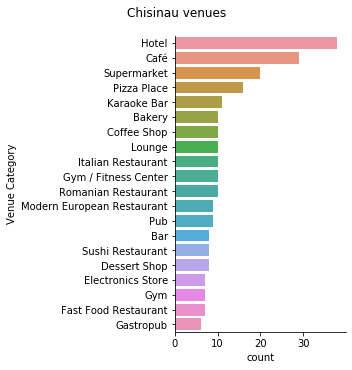

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(y='Venue Category', data=ch_venues, kind='count', order=ch_venues['Venue Category'].value_counts().iloc[:20].index)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Chisinau venues')

Text(0.5, 0.98, 'Odessa venues')

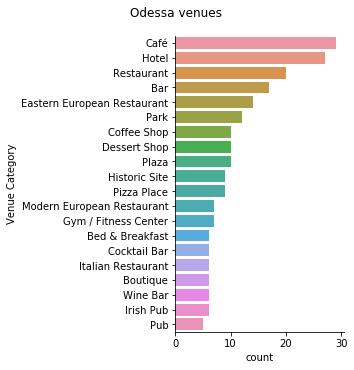

In [93]:
g = sns.catplot(y='Venue Category', data=ode_venues, kind='count', order=ode_venues['Venue Category'].value_counts().iloc[:20].index)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Odessa venues')

Text(0.5, 0.98, 'Iasi venues')

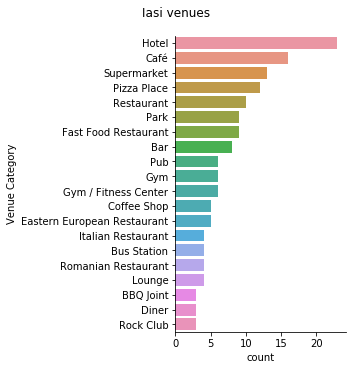

In [94]:
g = sns.catplot(y='Venue Category', data=iasi_venues, kind='count', order=iasi_venues['Venue Category'].value_counts().iloc[:20].index)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Iasi venues')

By far, hotel & cafe venues are the most in all these cities. Also, an interesting fact is related to 3rd position. In Chisinau and Iasi, it is the same - supermarket, while in Odessa it isn't present even in top 20 venues. This is an indicator of a business opportunity in the city. We will explore this fact more detailed and focus on potential deployment of a supermarket chain in Odessa.

Let's see supermarket venues distribution by ward for Chisinau & Iasi.

In [96]:
ch_venues[ch_venues['Venue Category'] == 'Supermarket'].groupby('Ward').count()

,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Ward,,,,,,
Bacioii Noi,1,1,1,1,1,1
Buiucanii Noi,1,1,1,1,1,1
Cartierul 8,3,3,3,3,3,3
Caucaz,1,1,1,1,1,1
Frumoasa,1,1,1,1,1,1
Fulgulești,1,1,1,1,1,1
Hrusca,1,1,1,1,1,1
Hutuleuca,1,1,1,1,1,1
Malina Mare,2,2,2,2,2,2


In [97]:
iasi_venues[iasi_venues['Venue Category'] == 'Supermarket'].groupby('Ward').count()

,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Ward,,,,,,
Bulevardul Tudor Vladimirescu,2,2,2,2,2,2
Canta,1,1,1,1,1,1
Dacia,1,1,1,1,1,1
Gară,1,1,1,1,1,1
Mircea cel Bătrân,1,1,1,1,1,1
Moara de Foc,2,2,2,2,2,2
Păcurari,1,1,1,1,1,1
Sărărie,1,1,1,1,1,1
Târgu Cucu,1,1,1,1,1,1


As it is observed, for each ward corresponds a supermarket, with some exceptions.

#### Let's explore the venues of interest geographic distribution in Iasi & Chisinau.

First, let's filter out supermarket only venues from initial venues dataframe.

In [100]:
ch_smrkt = []
ch_smrkt = ch_venues[ch_venues['Venue Category'] == 'Supermarket']

In [102]:
map_ch = folium.Map(location=[47.0244707, 28.8322534], zoom_start=11)

# add markers to map
for lat, lng, venue, ward in zip(ch_smrkt['Venue Latitude'], ch_smrkt['Venue Longitude'], ch_smrkt['Venue'], ch_smrkt['Ward']):
    label = '{}, {}'.format(venue, sector)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ch)  
    
map_ch

Actual number of supermarkets in Chisinau is much larger that the one get from Foursquare data. If looking only at one chain of this venue type distribution on https://nr1.md/ro/shops/, it is clearly visible that this venue data isn't complete.
Anyway, let's procede with the analysis further.

In [103]:
iasi_smrkt = []
iasi_smrkt = iasi_venues[iasi_venues['Venue Category'] == 'Supermarket']

In [105]:
map_iasi = folium.Map(location=[47.1615341, 27.5836142], zoom_start=11)

for lat, lng, venue, ward in zip(iasi_smrkt['Venue Latitude'], iasi_smrkt['Venue Longitude'], iasi_smrkt['Venue'], iasi_smrkt['Ward']):
    label = '{}, {}'.format(venue, sector)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_iasi)  
    
map_iasi

This type of venues is located mostly in residential areas, so from geographic distribution it is visible that in city centers, which are mostly business areas, they aren't present. Let's keep that in mind for Odessa topology.

## Time for real machine learning

Let's do the one hot encoding mask for Odessa in order to see whether the algorithm would recommend supermarket as a venue to deploy in it.

In [108]:
# one hot encoding
ode_onehot = pd.get_dummies(ode_venues[['Venue Category']], prefix="", prefix_sep="")

# add ward column back to dataframe
ode_onehot['Ward'] = ode_venues['Ward'] 

# move ward column to the first column
fixed_columns = [ode_onehot.columns[-1]] + list(ode_onehot.columns[:-1])
ode_onehot = ode_onehot[fixed_columns]

ode_onehot.head()

,Ward,Art Museum,Asian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Store,Bistro,Boarding House,Boutique,Breakfast Spot,Bubble Tea Shop,Building,Bus Station,Bus Stop,Café,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Dance Studio,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Ice Cream Shop,Irish Pub,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Kebab Restaurant,Light Rail Station,Market,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Opera House,Optical Shop,Palace,Park,Pedestrian Plaza,Pet Store,Pharmacy,Pier,Pizza Place,Plaza,Pool,Pool Hall,Port,Pub,Recording Studio,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Spa,Sports Bar,Street Art,Supermarket,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Ukrainian Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,Аркадия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Аркадия,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Аркадия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Аркадия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Аркадия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [109]:
ode_onehot.shape

(418, 118)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [111]:
ode_grouped = ode_onehot.groupby('Ward').mean().reset_index()
ode_grouped

,Ward,Art Museum,Asian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Store,Bistro,Boarding House,Boutique,Breakfast Spot,Bubble Tea Shop,Building,Bus Station,Bus Stop,Café,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Dance Studio,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Ice Cream Shop,Irish Pub,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Kebab Restaurant,Light Rail Station,Market,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Opera House,Optical Shop,Palace,Park,Pedestrian Plaza,Pet Store,Pharmacy,Pier,Pizza Place,Plaza,Pool,Pool Hall,Port,Pub,Recording Studio,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Spa,Sports Bar,Street Art,Supermarket,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Ukrainian Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,Аркадия,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.037037,0.0,0.018519,0.018519,0.000000,0.018519,0.018519,0.000000,0.000000,0.000000,0.055556,0.000000,0.018519,0.0,0.000000,0.000000,0.092593,0.000000,0.018519,0.018519,0.000000,0.000000,0.037037,0.000000,0.000000,0.018519,0.000000,0.000000,0.018519,0.018519,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.018519,0.000000,0.000000,0.037037,0.018519,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.092593,0.055556,0.000000,0.000000,0.000000,0.000000,0.018519,0.0,0.0000,0.0000,0.018519,0.000000,0.000000,0.018519,0.000000,0.000000,0.018519,0.000000,0.000000,0.0000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.0,0.055556,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.018519,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.018519,0.0000,0.018519,0.000000,0.000000,0.018519,0.000000,0.000000
1,Ближние Мельницы,0.0000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Большевик,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

#### Let's confirm the new size

In [112]:
ode_grouped.shape

(15, 118)

#### Let's print each neighborhood from Odessa along with the top 5 most common venues that are being present in them

In [114]:
num_top_venues = 5

for hood in ode_grouped['Ward']:
    print("----"+hood+"----")
    temp = ode_grouped[ode_grouped['Ward'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Аркадия----
            venue  freq
0           Hotel  0.09
1     Coffee Shop  0.09
2            Café  0.06
3  Ice Cream Shop  0.06
4      Restaurant  0.06


----Ближние Мельницы----
                  venue  freq
0                   Gym  0.14
1              Pharmacy  0.14
2  Gym / Fitness Center  0.14
3           Supermarket  0.14
4                   Bar  0.14


----Большевик----
               venue  freq
0  Convenience Store   1.0
1         Art Museum   0.0
2          Pool Hall   0.0
3              Plaza   0.0
4        Pizza Place   0.0


----Большой Фонтан----
                         venue  freq
0  Eastern European Restaurant   0.2
1                       Resort   0.2
2           Light Rail Station   0.2
3              Bed & Breakfast   0.2
4                         Park   0.2


----Дальние Мельницы----
             venue  freq
0   Farmers Market  0.14
1  Automotive Shop  0.14
2             Park  0.14
3      Gas Station  0.14
4             Café  0.14


----Котовского----
      

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in ascending order.

In [115]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=True)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [124]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Ward'] = ode_grouped['Ward']

for ind in np.arange(ode_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ode_grouped.iloc[ind, :], num_top_venues)

In [125]:
neighborhoods_venues_sorted

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Аркадия,Art Museum,Optical Shop,Opera House,Nightclub,Music Venue,Museum,Moroccan Restaurant,Monument / Landmark,Mobile Phone Shop,Market
1,Ближние Мельницы,Art Museum,Pier,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant
2,Большевик,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub
3,Большой Фонтан,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant
4,Дальние Мельницы,Art Museum,Pizza Place,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Palace,Optical Shop,Opera House,Nightclub
5,Котовского,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub
6,Ланжерон,Art Museum,Nightclub,New American Restaurant,Music Venue,Multiplex,Mobile Phone Shop,Market,Light Rail Station,Kebab Restaurant,Karaoke Bar
7,Лузановка,Art Museum,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,New American Restaurant,Music Venue
8,Люстдорф,Art Museum,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant
9,Молдаванка,Art Museum,Nightclub,New American Restaurant,Music Venue,Multiplex,Mobile Phone Shop,Market,Light Rail Station,Kebab Restaurant,Karaoke Bar


Unfortunately, supermarket venue isn't found in the ones recommended by the function. A workaround would be to make a lookup of venues types from Chisinau or Iasi with the ones from Odessa, then to make a recommending function based on the result.

<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to check optimal cluster number to be used for Odessa based on WCSS method. In our data, there were tottally 15 wards.

C:\Users\edenibr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)


<function matplotlib.pyplot.show(*args, **kw)>

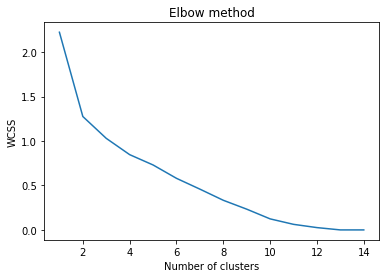

In [126]:
wcss = []
# set number of clusters
krange = range(1, 15)

ode_grouped_clustering = ode_grouped.drop('Ward', 1)

# run k-means clustering
for i in krange:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(ode_grouped_clustering)
    wcss.append(kmeans.inertia_)
# check cluster labels generated for each row in the dataframe
plt.plot(krange, wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

The optimal number is the inflection point, that is 10, as could be seen from the graph.

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [127]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(ode_grouped_clustering)
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ode_merged = df_ode

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ode_merged = ode_merged.join(neighborhoods_venues_sorted.set_index('Ward'), on='Ward')

ode_merged.head() # check the last columns!

,Sector,Ward,City,Country,WARD_ADDRESS,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Приморский,Аркадия,Одесса,Украина,"Аркадия,Одесса,Украина","Приморский,Аркадия,Одесса,Украина",None,"(Аркадія, Одеса, Приморський район, Одеса, Оде...",None,"(46.431789, 30.760832, 0.0)",46.431789,30.760832,NaN,46.431789,30.760832,0.0,0,Art Museum,Optical Shop,Opera House,Nightclub,Music Venue,Museum,Moroccan Restaurant,Monument / Landmark,Mobile Phone Shop,Market
1,Малиновский,Ближние Мельницы,Одесса,Украина,"Ближние Мельницы,Одесса,Украина","Малиновский,Ближние Мельницы,Одесса,Украина","(Малиновський провулок, 0-й квартал, Дача Дашк...","(Район І-6 ""Ближні Млини"", Малиновський район,...","(46.4474369, 30.7045332, 0.0)","(46.4475896, 30.7169815, 0.0)",46.447437,30.704533,0.0,46.447590,30.716981,0.0,5,Art Museum,Pier,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant
2,Суворовский,Большевик,Одесса,Украина,"Большевик,Одесса,Украина","Суворовский,Большевик,Одесса,Украина",None,"(Селище Більшовик, Суворовський район, Одеса, ...",None,"(46.5521679, 30.7181097, 0.0)",46.552168,30.718110,NaN,46.552168,30.718110,0.0,1,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub
3,Киевский,Большой Фонтан,Одесса,Украина,"Большой Фонтан,Одесса,Украина","Киевский,Большой Фонтан,Одесса,Украина",None,"(Великий Фонтан, Київський район, Одеса, Одесь...",None,"(46.3947453, 30.7460289, 0.0)",46.394745,30.746029,NaN,46.394745,30.746029,0.0,3,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant
4,Малиновский,Дальние Мельницы,Одесса,Украина,"Дальние Мельницы,Одесса,Украина","Малиновский,Дальние Мельницы,Одесса,Украина","(Малиновський районний суд, 1а, Василя Стуса в...","(Дальні Млини, Малиновський район, Одеса, Одес...","(46.4622181, 30.690569797930447, 0.0)","(46.457542, 30.69342, 0.0)",46.462218,30.690570,0.0,46.457542,30.693420,0.0,7,Art Museum,Pizza Place,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Palace,Optical Shop,Opera House,Nightclub


Finally, let's visualize the resulting clusters

In [132]:
# create map
map_clusters = folium.Map(location=[46.4873195, 30.7392776], zoom_start=11)

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ode_merged['sctw_latitude'], ode_merged['sctw_longitude'], ode_merged['Ward'], ode_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

#### Cluster 1

In [133]:
ode_merged.loc[ode_merged['Cluster Labels'] == 0, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Аркадия,"Приморский,Аркадия,Одесса,Украина",None,"(Аркадія, Одеса, Приморський район, Одеса, Оде...",None,"(46.431789, 30.760832, 0.0)",46.431789,30.760832,NaN,46.431789,30.760832,0.0,0,Art Museum,Optical Shop,Opera House,Nightclub,Music Venue,Museum,Moroccan Restaurant,Monument / Landmark,Mobile Phone Shop,Market
5,Ланжерон,"Приморский,Ланжерон,Одесса,Украина","(Приморський бульвар, Ланжерон, Одеса, Приморс...","(Ланжерон, Ланжерон пляж, Ланжерон, Одеса, При...","(46.4878815, 30.7412879, 0.0)","(46.47463845, 30.765138978748126, 0.0)",46.487882,30.741288,0.0,46.474638,30.765139,0.0,0,Art Museum,Nightclub,New American Restaurant,Music Venue,Multiplex,Mobile Phone Shop,Market,Light Rail Station,Kebab Restaurant,Karaoke Bar
8,Молдаванка,"Приморский,Молдаванка,Одесса,Украина","(Приморський бульвар, Ланжерон, Одеса, Приморс...","(Район І-4 ""Молдаванка"", Малиновський район, О...","(46.4878815, 30.7412879, 0.0)","(46.473984, 30.714464, 0.0)",46.487882,30.741288,0.0,46.473984,30.714464,0.0,0,Art Museum,Nightclub,New American Restaurant,Music Venue,Multiplex,Mobile Phone Shop,Market,Light Rail Station,Kebab Restaurant,Karaoke Bar
11,Таирова,"Киевский,Таирова,Одесса,Украина",None,"(Площадь Таирова, Район IV-5 «Південний», Київ...",None,"(46.39120835, 30.72367405, 0.0)",46.391208,30.723674,NaN,46.391208,30.723674,0.0,0,Art Museum,Opera House,New American Restaurant,Music Venue,Museum,Multiplex,Moroccan Restaurant,Monument / Landmark,Modern European Restaurant,Mobile Phone Shop
12,Сахалинчик,"Приморский,Сахалинчик,Одесса,Украина","(Приморський бульвар, Ланжерон, Одеса, Приморс...","(Сахалінчик, Одеса, Приморський район, Одеса, ...","(46.4878815, 30.7412879, 0.0)","(46.4579533, 30.7338238, 0.0)",46.487882,30.741288,0.0,46.457953,30.733824,0.0,0,Art Museum,Nightclub,New American Restaurant,Music Venue,Multiplex,Mobile Phone Shop,Market,Light Rail Station,Kebab Restaurant,Karaoke Bar
13,Слободка,"Суворовский,Слободка,Одесса,Украина","(Бізнес-центр ""Суворівський"", 47/1, Косвена ву...","(Солдатська Слобідка, Суворовський район, Одес...","(46.49504355, 30.728425184555093, 0.0)","(46.5442379, 30.7112493, 0.0)",46.495044,30.728425,0.0,46.544238,30.711249,0.0,0,Hot Spring,Pier,Pharmacy,Pet Store,Park,Palace,Opera House,New American Restaurant,Music Venue,Museum


6 initial wards from Odessa can be grouped as one in order to get a relevant venue data under sector ID 0.

#### Cluster 2

In [134]:
ode_merged.loc[ode_merged['Cluster Labels'] == 1, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Большевик,"Суворовский,Большевик,Одесса,Украина",None,"(Селище Більшовик, Суворовський район, Одеса, ...",None,"(46.5521679, 30.7181097, 0.0)",46.552168,30.71811,NaN,46.552168,30.71811,0.0,1,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub


#### Cluster 3

In [135]:
ode_merged.loc[ode_merged['Cluster Labels'] == 2, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Котовского,"Суворовский,Котовского,Одесса,Украина","(30-а лінія вулиця, Мікрорайон ""ІІІ-3-3"", Шевч...","(Селище Котовського, Суворовський район, Одеса...","(46.5810582, 30.7780476, 0.0)","(46.5648233, 30.7735147, 0.0)",46.581058,30.778048,0.0,46.564823,30.773515,0.0,2,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub


#### Cluster 4

In [136]:
ode_merged.loc[ode_merged['Cluster Labels'] == 3, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Большой Фонтан,"Киевский,Большой Фонтан,Одесса,Украина",None,"(Великий Фонтан, Київський район, Одеса, Одесь...",None,"(46.3947453, 30.7460289, 0.0)",46.394745,30.746029,NaN,46.394745,30.746029,0.0,3,Art Museum,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant


#### Cluster 5

In [137]:
ode_merged.loc[ode_merged['Cluster Labels'] == 5, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ближние Мельницы,"Малиновский,Ближние Мельницы,Одесса,Украина","(Малиновський провулок, 0-й квартал, Дача Дашк...","(Район І-6 ""Ближні Млини"", Малиновський район,...","(46.4474369, 30.7045332, 0.0)","(46.4475896, 30.7169815, 0.0)",46.447437,30.704533,0.0,46.44759,30.716981,0.0,5,Art Museum,Pier,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant


#### Cluster 6

In [138]:
ode_merged.loc[ode_merged['Cluster Labels'] == 6, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Лузановка,"Суворовский,Лузановка,Одесса,Украина",None,"(Лузанівка, Суворовський район, Одеса, Одеська...",None,"(46.5549529, 30.7607122, 0.0)",46.554953,30.760712,NaN,46.554953,30.760712,0.0,6,Art Museum,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,New American Restaurant,Music Venue


#### Cluster 7

In [139]:
ode_merged.loc[ode_merged['Cluster Labels'] == 7, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Дальние Мельницы,"Малиновский,Дальние Мельницы,Одесса,Украина","(Малиновський районний суд, 1а, Василя Стуса в...","(Дальні Млини, Малиновський район, Одеса, Одес...","(46.4622181, 30.690569797930447, 0.0)","(46.457542, 30.69342, 0.0)",46.462218,30.69057,0.0,46.457542,30.69342,0.0,7,Art Museum,Pizza Place,Pier,Pharmacy,Pet Store,Pedestrian Plaza,Palace,Optical Shop,Opera House,Nightclub


#### Cluster 8

In [140]:
ode_merged.loc[ode_merged['Cluster Labels'] == 8, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Люстдорф,"Киевский,Люстдорф,Одесса,Украина",None,"(Люстдорф, Свободи проспект, Чорноморка, Київс...",None,"(46.3502011, 30.7023901, 0.0)",46.350201,30.70239,NaN,46.350201,30.70239,0.0,8,Art Museum,Pharmacy,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant


#### Cluster 9

In [141]:
ode_merged.loc[ode_merged['Cluster Labels'] == 9, ode_merged.columns[[1] + list(range(5, ode_merged.shape[1]))]]

,Ward,SCT_WARD_ADDRESS,sctw_location,ward_location,sctw_point,ward_point,sctw_latitude,sctw_longitude,sctw_altitude,ward_latitude,ward_longitude,ward_altitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Черёмушки,"Малиновский,Черёмушки,Одесса,Украина",None,"(Житловий комплекс ""Нові Черемушки"", Район І-6...",None,"(46.44214045, 30.712706749999995, 0.0)",46.44214,30.712707,NaN,46.44214,30.712707,0.0,9,Art Museum,Pier,Pet Store,Pedestrian Plaza,Park,Palace,Optical Shop,Opera House,Nightclub,New American Restaurant
